# Adversarial Search: Playing Connect 4

Student Name: Travis Peck

I have used the following AI tools: None

I understand that my submission needs to be my own work: TP

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

In [1]:
# Initial State: The initial state is either an empty board or a preset board with tokens of a value 1 or -1.
# Actions: The set of available actions are the column numbers of the board that have an open space available to 'drop' a token
# Transition model: The transition model is the resulting state that exists after a player drops a token in an available column
# Goal state: Any state that has 4 consecutive tokens in a diagonal, horizontal, or vertical order. If this state occurs after an action, the state is terminal and the game is concluded

How big is the state space? Give an estimate and explain it.

In [2]:
# With 6 rows and 7 columns in a typical board of connect 4, this leads to 42 cells. Each of these cells can be one of three states (1, 0, -1). 
# This would be a theoretical maximum of 3^42 possibilities, but this doesn't account for certain rules such as how gravity constrains the amount of moves possible, 
# terminal states limit the amount of possible moves, and that players alternate turns.
# Research suggests that there are 4.53 trillion possibilities, accounting for the constraints I listed above.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [3]:
# With a time complexity of O(b^m), with b=number of legal moves at each points, and m=maximum depth of the tree, 
# we can summarize this as the sum of powers of the branching factor, reduced by each layer of the tree as fewer moves become available
# Total Nodes = Summation(0 through 42) of b^d 
# b = branching factor (about 4-5 for most games as the columns get filled up)
# Therefore, we would have a game tree of (5^43 - 1) / 4

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [4]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

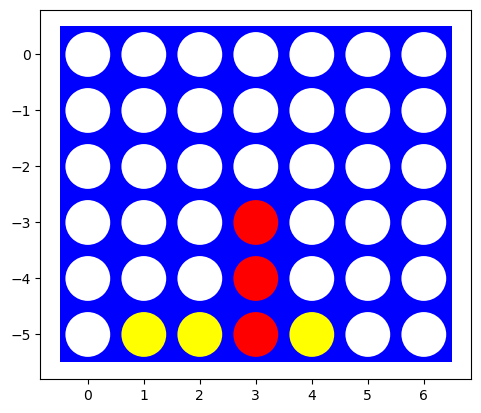

In [5]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [6]:
# Returns the indices of the columns that have at least 1 open spot for a disk
def actions(s):
    return [col for col in range(len(s[0])) if s[0][col] == 0]

In [7]:
# Transition model
def results(s, a, player):
    if a == None:
        return s
    # A is an index of which column the agent wants to choose 
    choice = a
    
    # Iterates through each row in the board
    for i, row in enumerate(s):
        # Space that we examine to see if its available
        check = s[i][choice]
        # If the bottom row and empty, we can play there
        if (i == len(s) - 1) and check == 0:
            #s = s.copy()
            s[i][choice] = player
            return s
        # If the row has an enemy token, we can place on top of it
        if check != 0:
            s[i-1][choice] = player
            return s

In [8]:
board= [
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0],
    [0, 0,-1, 1,-1, 0, 0]
]

In [9]:
board

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0],
 [0, 0, -1, 1, -1, 0, 0]]

In [10]:
def check_win(s):
    rows = len(s)  
    cols = len(s[0]) 
    def in_bounds(x, y):
        return 0 <= x < rows and 0 <= y < cols
    directions = [(0, 1), (1, 0), (1, 1), (1, -1)]
    for i in range(rows):
        for j in range(cols):
            if s[i][j] != 0: 
                player = s[i][j]  
                for dx, dy in directions:
                    win = True
                    # Check the next three cells in the chosen direction
                    for n in range(1, 4):
                        x, y = i + dx * n, j + dy * n
                        # Check if the next cells are in bounds and belong to the same player
                        if not in_bounds(x, y) or s[x][y] != player:
                            win = False  # Not a winning sequence
                            break
                    if win:
                        return player
    if all(s[0][col] != 0 for col in range(cols)):
        return 'draw' 

    return 'next' 

In [11]:
def terminal(s):
    # If check_wins leads to a win or a draw (the spaces are completely filled), the game is terminal
    if check_win(s) == 1 or check_win(s) == -1 or check_win(s) == 'draw':
        return True
    else:
        return False


In [12]:
def utility(s):
    # Depending on which player won, return a utility matching to either the maximizing or minimizing player
    goal = check_win(s)
    if goal == 1: return 1
    if goal == 'draw': return 0
    if goal == -1: return -1
    # If utility == none, we will keep exploring (this is relevant in our minimax search function)
    else:
        return None

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [13]:
# Your code/ answer goes here.
import random
# Random agent
def random_player(s, player=None):
    # Randomly choosing between the available columns
    choices = actions(s)
    # If there are no available columns, the game is a draw
    if len(choices) == 0:
        return 'draw'
    selection = random.choice(choices)
    return(selection)

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [14]:
# Your code/ answer goes here.
import time
import random

#Function to switch players
def switch_player(player):
    if player == 1:
        return -1
    else:
        return 1

def play(player1, player2, board='empty', N=1000):
    # List keeping track of who wins
    wins = []
    # We will set the first player as the maximizing player rather than random, because it will allow us to easily keep track of which agent is maximizing and which is minimizing
    player = 1
    
    for i in range(0,N):
        if board == 'empty':
            s = empty_board(shape = (4,4))
        else:
            s = board

        while True:
            # First player's move
            move1 = player1(s)
            # Transition model to get resulting state from action
            s = results(s, move1, player=player)
            # Checking for win or draw
            if terminal(s) == True or move1 == None:
                if check_win(s) == 'draw':
                    print('DRAW')
                    break
                else:
                    print(f'Player {player} wins!')
                    wins.append(player)
                    break
            # Switch player value
            player = switch_player(player)

            # Other player's move
            move2 = player2(s)

            # Getting resulting state from action
            s = results(s, move2, player=player)
            # Checking if the game is terminal
            if terminal(s) == True or move2 == None:
                if check_win(s) == 'draw':
                    print('DRAW')
                    break
                else:
                    print(f'Player {player} wins!')
                    wins.append(player)
                    break
            # Switch back to other player
            player = switch_player(player)
    print()
    return wins, s
        

In [15]:
%time wins,s = play(random_player, random_player)

DRAW
DRAW
DRAW
DRAW
Player 1 wins!
DRAW
DRAW
Player 1 wins!
Player -1 wins!
Player -1 wins!
Player 1 wins!
Player -1 wins!
Player -1 wins!
DRAW
Player 1 wins!
DRAW
DRAW
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
DRAW
DRAW
DRAW
Player 1 wins!
DRAW
DRAW
DRAW
Player -1 wins!
Player 1 wins!
DRAW
Player -1 wins!
Player -1 wins!
DRAW
DRAW
Player -1 wins!
DRAW
DRAW
DRAW
DRAW
DRAW
Player 1 wins!
Player 1 wins!
DRAW
DRAW
DRAW
DRAW
DRAW
DRAW
DRAW
DRAW
DRAW
Player -1 wins!
DRAW
DRAW
Player -1 wins!
DRAW
DRAW
Player 1 wins!
Player 1 wins!
DRAW
Player 1 wins!
Player -1 wins!
Player -1 wins!
DRAW
DRAW
Player -1 wins!
DRAW
Player 1 wins!
DRAW
Player -1 wins!
DRAW
DRAW
Player 1 wins!
Player 1 wins!
DRAW
DRAW
Player 1 wins!
DRAW
Player 1 wins!
DRAW
DRAW
DRAW
Player 1 wins!
DRAW
Player -1 wins!
DRAW
Player -1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player -1 wins!
Player -1 wins!
DRAW
DRAW
Player 1 wins!
Player -1 wi

In [16]:
print('1\'s wins:', wins.count(1))
print('-1\'s wins:', wins.count(-1))

1's wins: 260
-1's wins: 247


These results definitely make sense, as I would expect each one to win 50% of the time with random decisions

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [17]:
# Your code/ answer goes here.
import math 

class Agent:
    # Initializing self, only variable is player value to determine whether to minimize or maximize utility
    def __init__(self, player):
        self.player = player

    def minimax_search(self, s):
        # Maximizing player
        if self.player == 1:
            value, move = self.max_value(s, -math.inf, +math.inf)
            #print('move', move)
            return move
        # Minimizing player
        if self.player == -1:
            value, move = self.min_value(s, -math.inf, +math.inf)
            #print('move', move)
            return move

    def max_value(self, s, alpha, beta):
        # Getting utility
        v = utility(s)
        # If victory or draw, return the utility, move, and begin backpropagating
        if v is not None:
            return v, None
        v, move = -math.inf, None
        # For each action, finding the value that the other player will choose
        for a in actions(s):
            s_copy = s.copy()
            v2, a2 = self.min_value(results(s_copy, a, 1), alpha, beta)
            # Comparing different nodes until we find one that is optimal
            if v2 > v:
                v, move = v2, a
                alpha = max(alpha, v)
            # If v is greater than beta, return this optimal move
            if v >= beta:
                return v, move
        return v, move
    
    def min_value(self, s, alpha, beta):
        v = utility(s)
        if v is not None: 
            return v, None
        v, move = +math.inf, None
        # For each action, finding the value that the other player will choose
        for a in actions(s):
            s_copy = s.copy()
            v2, a2 = self.max_value(results(s_copy, a, -1), alpha, beta)
            # If v2 is better, set value and move to v2 and that action
            if v2 < v:
                v, move = v2, a
                # Beta will be the minimum between this value and the previous beta
                beta = min(beta, v)
            # If v is less than alpha, return this optimal move
            if v <= alpha:
                return v, move
        return v, move

In [18]:
# Your code/ answer goes here.
agent1 = Agent(1)
agent2 = Agent(-1)

wins, s = play(agent1.minimax_search, agent2.minimax_search, N=10)
print('1\'s wins:', wins.count(1))
print('-1\'s wins:', wins.count(-1))

DRAW
DRAW
DRAW
DRAW
DRAW
DRAW
DRAW
DRAW
DRAW
DRAW

1's wins: 0
-1's wins: 0


Every time, there was a draw. This makes sense, as the agents are looking to block each other's wins at every opportunity. This will eventually simply block wins and fill up the board

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

I will first make custom boards of the classic dimensions, then I will create custom boards with a 4 by 4 dimension. The reason for making the classic sized boards is to use for heuristic search.

In [19]:
s1 = empty_board(shape=(6,7))

s1[5][2:5] = 1
s1

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0]])

In [20]:
s2 = empty_board(shape=(6,7))
s2[5][3:5]=-1
s2[4][4]=-1
s2[5][5] = -1
s2[4][5] = -1
s2[3][5] = -1
s2[5][2] = 1
s2[4][3] = 1
s2[3][4] = 1
s2

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, -1,  0],
       [ 0,  0,  0,  1, -1, -1,  0],
       [ 0,  0,  1, -1, -1, -1,  0]])

In [21]:
s3 = empty_board(shape=(6,7))
s3[5][5]=-1
s3[4][5] = -1
s3[3][5] = -1
s3

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0, -1,  0]])

In [22]:
s4 = empty_board(shape=(6,7))
s4[5][3] = -1
s4[5][2] = 1
s4[4][2] = -1
s4[5][1] = 1
s4[4][1] = 1
s4[3][1] = -1
s4[5][0] = 1
s4[4][0] = 1
s4[3][0] = 1
s4

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 1, -1,  0,  0,  0,  0,  0],
       [ 1,  1, -1,  0,  0,  0,  0],
       [ 1,  1,  1, -1,  0,  0,  0]])

In [23]:
s5 = empty_board(shape=(6,7))
s5[5][2:5] = 1
s5[5][0] = -1
s5[4][0] = -1
s5[3][0] = -1
s5

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0,  0,  0],
       [-1,  0,  1,  1,  1,  0,  0]])

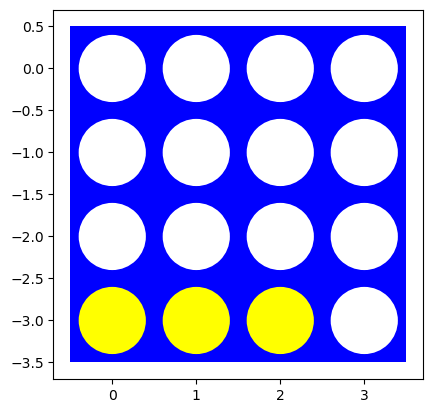

In [24]:
b1 = empty_board(shape=(4,4))
b1[3][0:3] = -1
visualize(b1)

In [25]:
print('Maximizings move:',agent1.minimax_search(b1))
print('Minimizings move:', agent2.minimax_search(b1))

Maximizings move: 3
Minimizings move: 2


The maximizing agent blocks the other agent's move, but the minimizing agent does not go for the winning move.

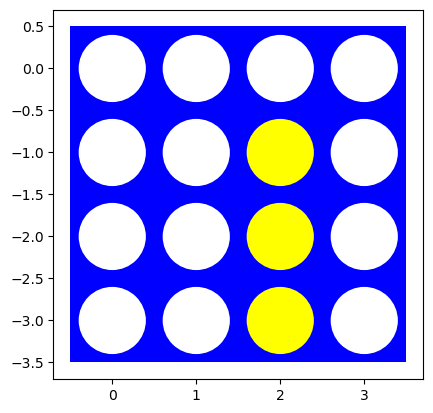

In [26]:
b2 = empty_board(shape=(4,4))
b2[3][2] = -1
b2[1][2] = -1
b2[2][2] = -1
visualize(b2)

In [27]:
print('Maximizings move:',agent1.minimax_search(b2))
print('Minimizings move:', agent2.minimax_search(b2))

Maximizings move: 2
Minimizings move: 0


Again, the maximizing agent blocks the win, but the minimizing agent does not go for the winning move

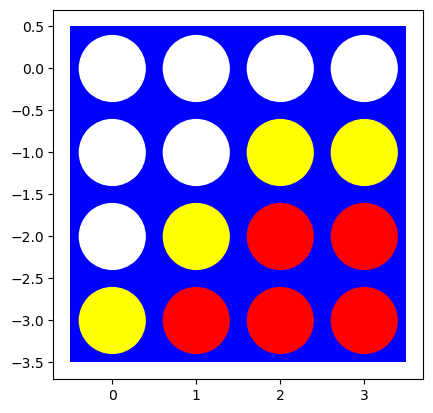

In [28]:
b3 = empty_board(shape=(4,4))
b3[3][1:3] = 1
b3[3][0] = -1
b3[2][1] = -1
b3[2][2] = 1 
b3[1][2] = -1
b3[3][3] = 1
b3[2][3] = 1
b3[1][3] = -1
visualize(b3)

In [29]:
print('Maximizings move:',agent1.minimax_search(b3))
print('Minimizings move:', agent2.minimax_search(b3))

Maximizings move: 0
Minimizings move: 0


The maximizing agent didn't immediately block the other's win. Also, the minimizing agent did not play a winning move.

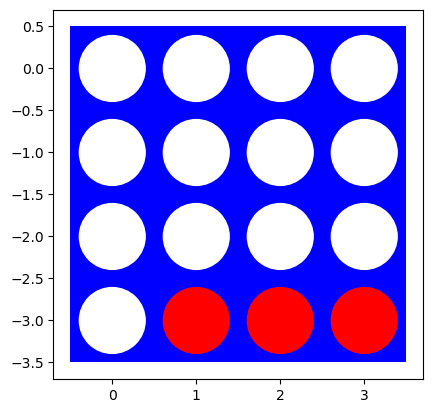

In [30]:
b4 = empty_board(shape=(4,4))
b4[3][1] = 1
b4[3][2] = 1
b4[3][3] = 1
visualize(b4)

In [31]:
print('Maximizings move:',agent1.minimax_search(b4))
print('Minimizings move:', agent2.minimax_search(b4))

Maximizings move: 0
Minimizings move: 0


The maximizing agent went for the winning move, and the minimizing agent sought to block the other's win.

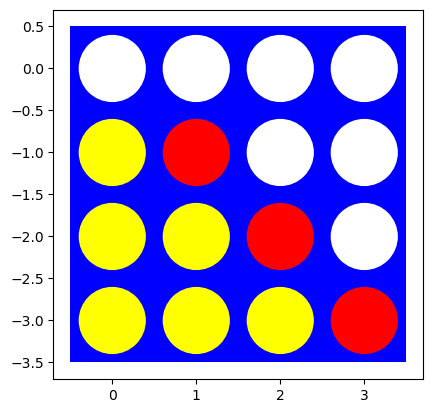

In [32]:
b5 = empty_board(shape=(4,4))
b5[3][0:3] = -1
b5[2][0:2] = -1
b5[1][0] = -1
b5[2][2] = 1
b5[1][1] = 1
b5[3][3] = 1
visualize(b5)

In [33]:
print('Maximizings move:',agent1.minimax_search(b5))
print('Minimizings move:', agent2.minimax_search(b5))

Maximizings move: 0
Minimizings move: 0


Both agents went for the winning move.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [34]:
# Your code/ answer goes here.
import time
import matplotlib.pyplot as plt
times = []
columns = []

board = empty_board(shape=(4,4))
for i in range (4,5):
    columns.append(i)
    board = empty_board(shape=(4,i))
    start=time.time()
    agent1.minimax_search(board)
    end=time.time()
    execution = end-start
    times.append(execution)
print(times)
print(columns)

#plt.plot(times, columns)
###plt.xlabel('Times in seconds')
#plt.ylabel('Column length')
#plt.show()

[1.4071340560913086]
[4]


It took 1.4 seconds each time I conducted the timing test on a board with 4 columns though.

Unfortunately, I wasn't even able to compute in a reasonable amount of time the minimax search time for a 4x5 board.

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

The middle rows have the most options for a consecutive line of 4 tokens. Therefore, the middle rows should have the highest possibility of leading to a win. Therefore, we will prioritize the middle rows and have them be the moves that the search algorithm examines first.

In [35]:
import time
import matplotlib.pyplot as plt
times2 = []

for i in range (1, 10):
    board = empty_board(shape=(4,4))
    start=time.time()
    agent1.minimax_search(board)
    end=time.time()
    execution = end-start
    times2.append(execution)
print(times2)

[1.4727168083190918, 1.2625699043273926, 1.2571132183074951, 1.2410180568695068, 1.2484698295593262, 1.238455057144165, 1.2470042705535889, 1.2336068153381348, 1.237239122390747]


Above, we are examining the timing before we implement move ordering

In [36]:
# For a classic sized board

def actions(s):
    choices = [col for col in range(len(s[0])) if s[0][col] == 0]
    # The middle rows have more opportunities to win, so we will add a priority to the middle rows
    priority = [0,1,2,3,2,1,0]
    priority = [priority[i] for i in choices]
    # Sets the priority rows as the first moves to check
    choices = [a for _,a in sorted(zip(priority,choices), reverse=True)]
    return choices

In [37]:
# For a four by four sized board
def actions(s):
    choices = [col for col in range(len(s[0])) if s[0][col] == 0]
    # The middle rows have more opportunities to win, so we will add a priority to the middle rows
    priority = [0,1,1,0]
    priority = [priority[i] for i in choices]
    # Sets the priority rows as the first moves to check
    choices = [a for _,a in sorted(zip(priority,choices), reverse=True)]
    return choices

actions(board)

[2, 1, 3, 0]

The middle rows are the first to be chosen out of the actions list

In [38]:
# Your code/ answer goes here.
import time
import matplotlib.pyplot as plt
times = []

for i in range (1, 10):
    board = empty_board(shape=(4,4))
    start=time.time()
    agent1.minimax_search(board)
    end=time.time()
    execution = end-start
    times.append(execution)
print(times)



[3.1629250049591064, 3.065884828567505, 3.069476842880249, 3.1233930587768555, 3.102519989013672, 3.106760025024414, 3.1207971572875977, 3.1367809772491455, 3.1058878898620605]


Ironically, the move ordering increased the amount of time that it took to search with the minimax algorithm

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [40]:
# While this will take a while for a classic connect 4 size, we can implement a heuristic function and a cutoff to limit the search space

#random_player(board)
agent3 = Agent(1)
agent4 = Agent(-1)
wins, s = play(agent1.minimax_search, agent2.minimax_search, N=5)

print('Player 1 wins:', wins.count(1))
print('Player -1 wins:', wins.count(-1))

DRAW
Player 1 wins!
DRAW
Player 1 wins!
DRAW

Player 1 wins: 2
Player -1 wins: 0


### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [41]:
# Your code/ answer goes here.
wins, s = play(agent1.minimax_search, random_player, N=10)

print('Player 1 wins:', wins.count(1))
print('Player -1 wins:', wins.count(-1))

Player 1 wins!
Player 1 wins!
DRAW
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
DRAW
Player 1 wins!
DRAW

Player 1 wins: 7
Player -1 wins: 0


The minimax search agent won a significantly more amount of games, and the randomized agent was only able to win twice and get 3 draws. This makes sense, as the minimax algorithm utilizes a strategy rather than a random guess like the random agent

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

For a heuristic function, we will build off of our check win function to tell if there are three in a row. If there are, we will add to our util variable which is the heuristic we are trying to maximize/minimize.

In [42]:
# Your code/ answer goes here.
def eval(s, player):
    util = 0
    rows = len(s) 
    cols = len(s[0])  

    def in_bounds(x, y):
        return 0 <= x < rows and 0 <= y < cols

    # Directions for checking three in a row: right, down, diagonal down-right, diagonal down-left
    directions = [(0, 1), (1, 0), (1, 1), (1, -1)]

    # Loop through each cell in the board
    for i in range(rows):
        for j in range(cols):
            if s[i][j] == player:  # Only check if the cell is not empty
                # Check all four directions for a line of three
                for dx, dy in directions:
                    setup = True
                    # Check the next two cells in the chosen direction
                    for n in range(1, 3):
                        x, y = i + dx * n, j + dy * n
                        # Check if the next cells are in bounds and belong to the same player
                        if not in_bounds(x, y) or s[x][y] != player:
                            setup = False  # Not a winning sequence
                            break
                    if setup:
                        util += player  # Found a winning sequence, game is terminal
    # Adding a lot of utility if board is a terminal state
    if check_win(s) == player:
        util += 10000000

    return util

In [43]:
eval(s5, -1)

-1

The evaluation function works, as it identified a correct opportunity in one of our preset 6x7 boards

This heuristic function evaluates if there are any grouping of three tokens in the map of the specified player, and increases utility based upon how much groupings of three that there are. If there is a winning play, it dramatically increases its utility.

In [44]:
# This object is mostly the same, but simply uses the evaluation function instead of the utility function. 
import math 

class Agent:
    # Initializing self, only variable is which mini or max player
    def __init__(self, player):
        self.player = player

    def minimax_search(self, s):
        if self.player == 1:
            value, move = self.max_value(s, -math.inf, +math.inf)
            return move
        if self.player == -1:
            value, move = self.min_value(s, -math.inf, +math.inf)
            return move

    def max_value(self, s, alpha, beta):
        v = eval(s, 1)
        if terminal(s) == True:
            return v, None
        v, move = -math.inf, None
        for a in actions(s):
            s_copy = s.copy()
            v2, a2 = self.min_value(results(s_copy, a, 1), alpha, beta)
            if v2 > v:
                v, move = v2, a
                alpha = max(alpha, v)
            if v >= beta:
                return v, move
        return v, move
    
    def min_value(self, s, alpha, beta):
        v = eval(s, -1)
        if terminal(s) == True:
            return v, None
        v, move = +math.inf, None
        for a in actions(s):
            s_copy = s.copy()
            v2, a2 = self.max_value(results(s_copy, a, -1), alpha, beta)
            if v2 < v:
                v, move = v2, a
                beta = min(beta, v)
            if v <= alpha:
                return v, move
        return v, move

    

In [45]:
agent1 = Agent(1)
agent2 = Agent(-1)

wins, s = play(agent1.minimax_search, agent2.minimax_search, board=empty_board(shape=(4,4)), N=1)


/var/folders/23/42bc0ch52rd5nhcggf3s1mxh0000gn/T/ipykernel_93110/4014877011.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if board == 'empty':


Player 1 wins!



### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [46]:
# Your code/ answer goes here.

import math 

class Agent:
    # Everything is the same, except I included the evaluation function in place of the utility function as well as the cutoff function to specify a maximum search depth
    def __init__(self, player, depth=0, maxdepth=5):
        self.player = player
        # Added a current depth and a max depth variable
        self.depth = depth
        self.maxdepth = maxdepth

    def minimax_search(self, s):
        if self.player == 1:
            value, move = self.max_value(s, -math.inf, +math.inf)
            return move
        if self.player == -1:
            value, move = self.min_value(s, -math.inf, +math.inf)
            return move

    def max_value(self, s, alpha, beta):
        # Evaluation function
        v = eval(s, 1)
        # Examining if the game is terminal or if the maximum node depth has been reached
        if self.is_cutoff(s) == True:
            return v, None
        self.depth += 1
        v, move = -math.inf, None
        for a in actions(s):
            s_copy = s.copy()
            v2, a2 = self.min_value(results(s_copy, a, 1), alpha, beta)
            if v2 > v:
                v, move = v2, a
                alpha = max(alpha, v)
            if v >= beta:
                return v, move
        return v, move
    
    def min_value(self, s, alpha, beta):
        v = eval(s, -1)
        if self.is_cutoff(s) == True:
            return v, None
        self.depth += 1
        v, move = +math.inf, None
        for a in actions(s):
            s_copy = s.copy()
            v2, a2 = self.max_value(results(s_copy, a, -1), alpha, beta)
            if v2 < v:
                v, move = v2, a
                beta = min(beta, v)
            if v <= alpha:
                return v, move
        return v, move

    def is_cutoff(self, s):
        # Cuts off the search at a certain depth or if the state is terminal
        if terminal(s) == True:
            return True
        if self.depth == self.maxdepth:
            return True
        else:
            return False

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [47]:
# Your code/ answer goes here.
agent = Agent(1, maxdepth=20000)
agent.minimax_search(b1)
agent.minimax_search(b2)
agent.minimax_search(b3)
agent.minimax_search(b4)
agent.minimax_search(b5)

2

The agent didn't spot the opportunity on one board, but it did spot the opportunity on the last board and blocked the other opponent from winning.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [48]:

# Your code/ answer goes here.
agent1 = Agent(1, maxdepth=100000)

import time
import matplotlib.pyplot as plt
times = []
columns = []

board = empty_board(shape=(4,4))
for i in range (4,20):
    columns.append(i)
    board = empty_board(shape=(4,i))
    start=time.time()
    agent1.minimax_search(board)
    end=time.time()
    execution = end-start
    times.append(execution)
print(times)

#plt.plot(times, columns)
###plt.xlabel('Times in seconds')
#plt.ylabel('Column length')
#plt.show()

[12.47970700263977, 1.71661376953125e-05, 1.8835067749023438e-05, 1.8835067749023438e-05, 2.09808349609375e-05, 2.4080276489257812e-05, 2.5987625122070312e-05, 2.8133392333984375e-05, 3.314018249511719e-05, 3.218650817871094e-05, 3.409385681152344e-05, 3.719329833984375e-05, 3.814697265625e-05, 4.00543212890625e-05, 4.291534423828125e-05, 4.506111145019531e-05]


For the size that did find an optimal solution, it took 12 seconds. However, it took only a fraction of the second for the board sizes that were too large to find a move in time (before it hit the max depth)

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [49]:
# Your code/ answer goes here.
agent1 = Agent(1, maxdepth=1000000)
agent2 = Agent(-1, maxdepth=10000000)

play(agent1.minimax_search, agent2.minimax_search, board=empty_board(shape=(4,4)), N=1)

/var/folders/23/42bc0ch52rd5nhcggf3s1mxh0000gn/T/ipykernel_93110/4014877011.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if board == 'empty':


Player 1 wins!



([1],
 array([[ 0, -1, -1,  0],
        [ 0,  1,  1,  0],
        [ 0, -1, -1, -1],
        [ 1,  1,  1,  1]]))

Oddly enough, the player with the smaller maximum depth won.

## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [52]:
# Your code/ answer goes here.
import time
import random

#Function to switch players
def switch_player(player):
    if player == 1:
        return -1
    else:
        return 1

def play(player1, player2, board='empty', N=10):
    # List keeping track of who wins
    wins = []
    
    for i in range(0,N):
        if board == 'empty':
            s = empty_board(shape = (6,7))
        else:
            s = board
        player = 1

        while True:
            # First player's move
            move1 = player1(s)
            # Transition model to get resulting state from action
            s = results(s, move1, player=player)
            # Checking for win or draw
            if terminal(s) == True or move1 == None:
                if check_win(s) == 'draw':
                    print('DRAW')
                    break
                else:
                    print(f'Player {player} wins!')
                    wins.append(player)
                    break
            # Switch player value
            player = switch_player(player)

            # Other player's move
            move2 = player2(s)
            # Getting resulting state from action
            s = results(s, move2, player=player)
            # Checking if the game is terminal
            if terminal(s) == True or move2 == None:
                if check_win(s) == 'draw':
                    print('DRAW')
                    break
                else:
                    print(f'Player {player} wins!')
                    wins.append(player)
                    break
            # Switch back to other player
            player = switch_player(player)
    print()
    return wins, s# Your code/ answer goes here.
def actions(s):
    return [col for col in range(len(s[0])) if s[0][col] == 0]

# Transition model
def results(s, a, player):
    if a == None:
        return s
    # A is an index of which column the agent wants to choose 
    choice = a
    
    # Iterates through each row in the board
    for i, row in enumerate(s):
        # Space that we examine to see if its available
        check = s[i][choice]
        # If the bottom row and empty, we can play there
        if (i == len(s) - 1) and check == 0:
            #s = s.copy()
            s[i][choice] = player
            return s
        # If the row has an enemy token, we can place on top of it
        if check != 0:
            s[i-1][choice] = player
            return s

def utility(s):
    # Depending on which player won, return a utility matching to either the maximizing or minimizing player
    goal = check_win(s)
    if goal == 1: return 1
    if goal == 'draw': return 0
    if goal == -1: return -1
    # If utility == none, we will keep exploring (this is relevant in our minimax search function)
    else:
        return None

def playout(s, a, player):
    s = s.copy()
    s = results(s, a, player)
    player = switch_player(player)

    while(True):
        u = utility(s)
        if u is not None: 
            return(u)

        # Random playout policy
        a = np.random.choice(actions(s))
        s = results(s, a, player)

        # Switch between players
        player = switch_player(player)

def playouts(s, a, player, N=60):
    return [playout(s, a, player) for i in range(N)]

def montecarlo(s, player=1, N=60):
    # Getting the average amount of utility 
    choices = actions(s)
    n = math.floor(N/len(choices))
    #print(f"Actions: {choices} ({N} total playouts = {n} playouts per action)")
    
    ps = { i : np.mean(playouts(s, i, player, N=n)) for i in choices}
    #display(ps)

    if player == 1:
        action = max(ps, key=ps.get)
    else: 
        action = min(ps, key=ps.get)
    #print('Action:', action)
    return action

In [53]:
# Returns the indices of the columns that have at least 1 open spot for a disk
def actions(s):
    return [col for col in range(len(s[0])) if s[0][col] == 0]

In [54]:
montecarlo(s1, 1)
montecarlo(s2, 1)
montecarlo(s3, 1)
montecarlo(s4, 1)
montecarlo(s5, 1)

1

In [55]:
move = montecarlo(s1, 1)
print(move)

1


The Monte Carlo method got every single winning move on all of the 6x7 boards. If there wasn't a winning move, it blocked the opponent's winning move. Amazing! 

### Best First Move

Use Pure Monte Carlo Search to determine what the best first move is? Describe under what assumptions this is the "best" first move.  

In [56]:
# Your code/ answer goes here.

board = empty_board(shape=(6,7))

montecarlo(board, -1, N=100)

3

In [57]:

%time print(montecarlo(board, 1, N = 1000))

print()
%time print(montecarlo(board, 1, N = 10000))

3
CPU times: user 639 ms, sys: 68.2 ms, total: 707 ms
Wall time: 669 ms

3
CPU times: user 5.8 s, sys: 409 ms, total: 6.2 s
Wall time: 5.97 s


The best first move is absolutely the middle-most column acording to the results. It has the highest percent chance of successfully leading to a win for both the maximizing and minimizing agent.

In [58]:
wins, s = play(random_player, montecarlo)
print(wins)

Player -1 wins!
Player -1 wins!
Player 1 wins!
Player -1 wins!
Player -1 wins!
Player -1 wins!
Player -1 wins!
Player -1 wins!
Player -1 wins!
Player -1 wins!

[-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]


In [59]:
play(random_player, random_player)

Player 1 wins!
Player -1 wins!
Player -1 wins!
Player 1 wins!
Player -1 wins!
Player 1 wins!
Player 1 wins!
Player 1 wins!
Player -1 wins!
Player -1 wins!



([1, -1, -1, 1, -1, 1, 1, 1, -1, -1],
 array([[ 1,  1, -1,  1,  1,  0,  0],
        [-1, -1,  1, -1, -1,  0, -1],
        [ 1,  1, -1, -1, -1,  0,  1],
        [-1, -1,  1,  1, -1, -1, -1],
        [ 1, -1,  1,  1,  1, -1,  1],
        [ 1, -1, -1,  1, -1,  1,  1]]))